# Chapter 4 : Activation functions 

In general we use different activation functions for different cases , understanding how they work will help choosing the right activation function for the particular use case. 

Activation function is applied to output of a neuron , which modifies outputs.  
We use activation functions because if the activation function itself is nonlinear, it allows for neural networks with usually two or more hidden layers to map nonlinear functions.

in general there are two types of activation functions , one type for the hidden layers and other for output layer . 

#### Step Activation Funciton : 

In a single neuron, if the weights*inputs + bias results in a value greater than 0, the neuron will fire and output a 1 
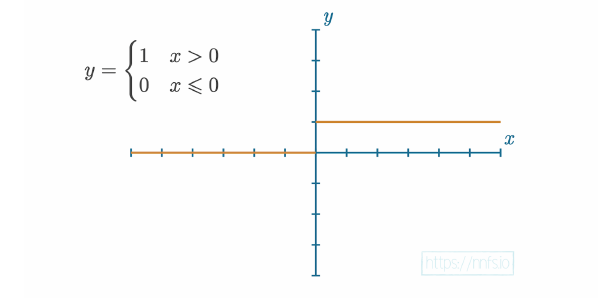

This activation function has been used historically in hidden layers, but nowadays, it is rarely a choice.

#### The Linear Activation Function : 

y=x -> slope 1 

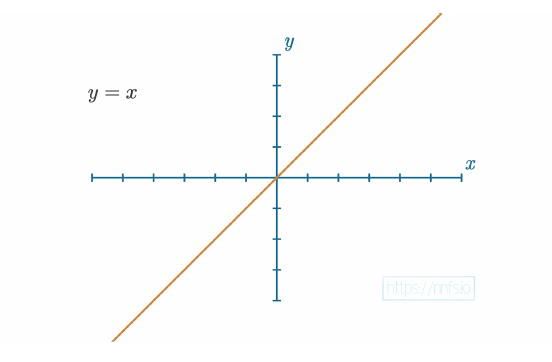

This activation function is usually applied to the last layer’s output in the case of a regression model => a model that outputs a scalar value instead of a classification

#### The Sigmoid Activation Function : 

For a step function its hard to asses the impact of the inof and very little info is gathered , as it outputs either 0 or 1 . its hard to tell how close the info is from activating the neuron or deactivating the neuron . 

So to optimize weights and biases , its easier for optimizer if we have activation functions which are more granular and informative 

sigmoid function : 

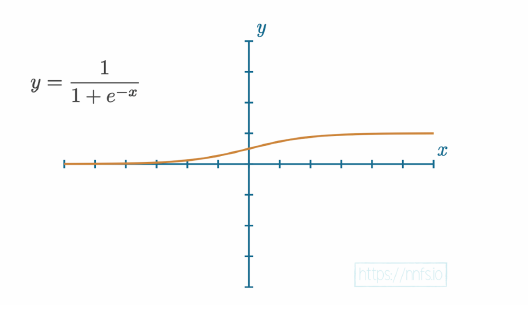

This function returns a value in the range of 0 for negative infinity, through 0.5 for the input of 0 and to 1 for positive infinity.

Output of sigmoid function will be in range from 0 and 1 . The Sigmoid function, historically used in hidden layers, was eventually replaced by the Rectified Linear Units activation function (or ReLU ).

#### The Rectified Linear Activation Function : 

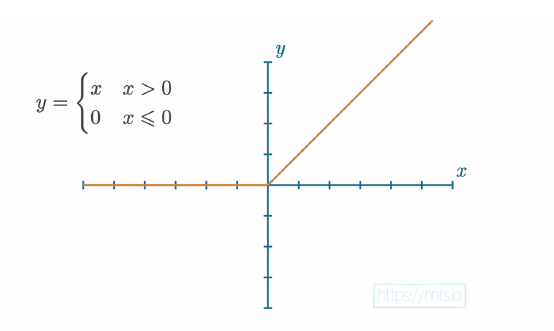

y= x when x >0 or 0 when x<=0

This simple yet powerful activation function is the most widely used activation function for various reasons — mainly speed and efficiency

#### ReLU Activation in a Pair of Neurons

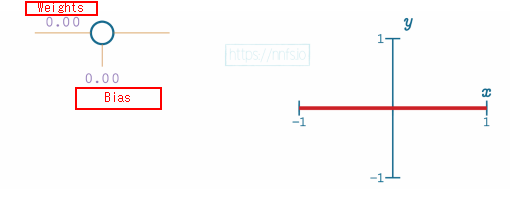

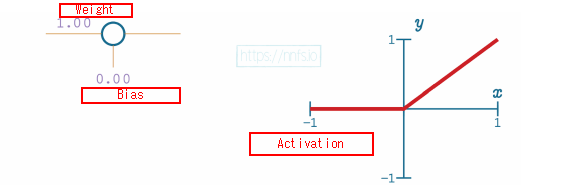

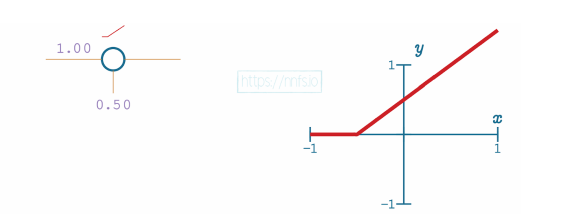

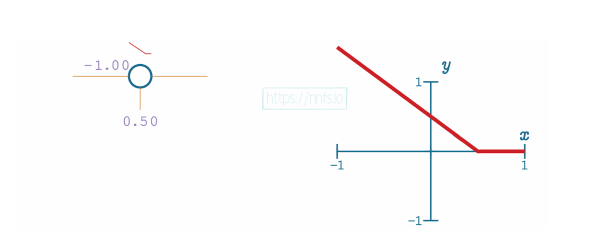

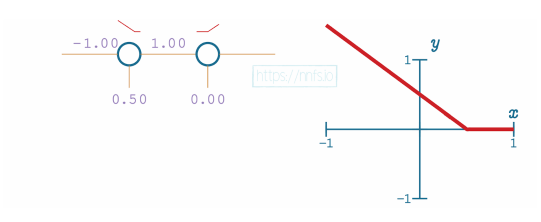

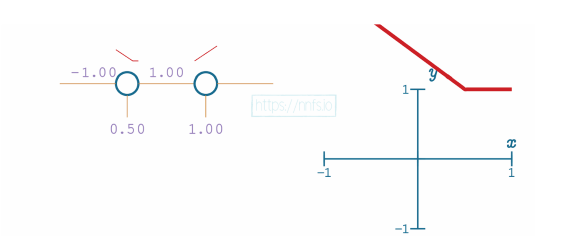

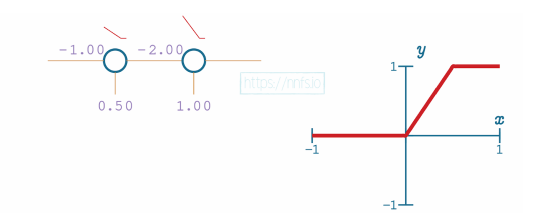

What we have here is a neuron that has both an activation and a deactivation point. When both neurons are activated, when their “area of effect” comes into play, they produce values in the range of the granular, variable, and output. If any neuron in the pair is inactive, the pair will produce non-variable output . 
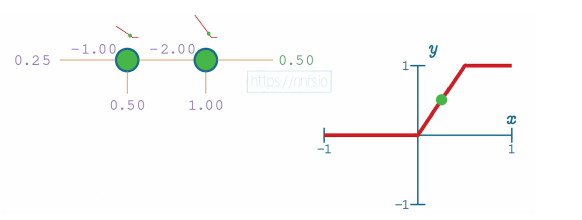

#### ReLU Activation in the Hidden Layers

refer the actual book for examples and assumptions taken . better not to note it here , its a bit all over the place in the book with no equations and random assumptions wrt to weights to fit a sine function . 

as a jist : 

- assumption 1 : layers are not densely connected . each neuron fron first layer connects to only one in the second layer . 
- assumption 2 : example model will take single value as an input 

but once the model was hand made the results and what neurons are activated for which input is nice to see : 
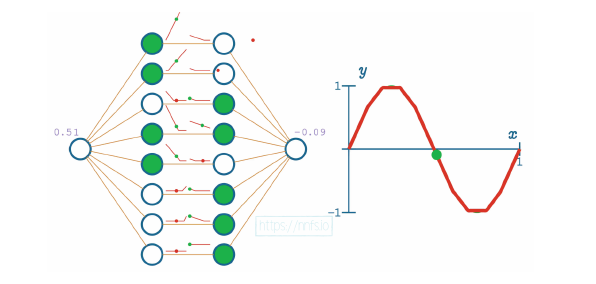

In [2]:
### RELU code 
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
    if i > 0 :
        output.append(i)
    else :
        output.append( 0 )
print (output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [3]:
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = []
for i in inputs:
    output.append( max ( 0 , i))
print (output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [4]:
import numpy as np
inputs = [ 0 , 2 , - 1 , 3.3 , - 2.7 , 1.1 , 2.2 , - 100 ]
output = np.maximum( 0 , inputs)
print (output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [5]:
# ReLU activation
class Activation_ReLU :
    # Forward pass
    def forward ( self , inputs ):
        # Calculate output values from input
        self.output = np.maximum( 0 , inputs)

In [10]:
from nnfs.datasets import spiral_data
#creating a dense layer class 

class Layer_Dense : 
    def __init__(self , n_inputs,n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    
    def forward(self, inputs): 
        self.output = np.dot(inputs , self.weights) + self.biases



In [11]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)

# Let's see output of the first few samples:
print (activation1.output[: 5 ])

[[0.         0.         0.        ]
 [0.         0.         0.00024106]
 [0.00017034 0.         0.00026665]
 [0.         0.         0.00070808]
 [0.00030848 0.         0.00058854]]


#### The Softmax Activation Function

- generally used for classifiers . 

- The softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and produce a normalized distribution of probabilities for our classes.

- distribution returned by the softmax activation function represents confidence scores for each class and will add up to 1 . 
- For example, if our network has a confidencedistribution for two classes: [0.45, 0.55] , the prediction is the 2nd class, but the confidence in this prediction isn’t very high.

- Both the numerator and the denominator of the Softmax function contain e raised to the power of z , where z , given indices, means a singular output value — the index i means the current sample and the index j means the current output in this sample.
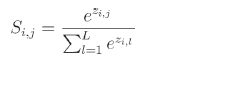

In [12]:
# e= 2.718

#some values from previous output 
layer_outputs = [ 4.8 , 1.21 , 2.385 ]

E = 2.71828182846

# For each value in a vector, calculate the exponential value
exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output) # ** - power operator in Python
print ( 'exponentiated values:' )
print (exp_values)

exponentiated values:
[121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [13]:
#now lets normalize the values . see the sigma function in the denominator , basically it normalises
# output between 0 and 1 and total sum to 1 as expected 

# Now normalize values
norm_base = sum (exp_values) # We sum all values
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print ( 'Normalized exponentiated values:' )
print (norm_values)
print ( 'Sum of normalized values:' , sum (norm_values))

Normalized exponentiated values:
[0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
Sum of normalized values: 1.0


In [14]:
#with numpy 

import numpy as np
# Values from the earlier previous when we described
# what a neural network is
layer_outputs = [ 4.8 , 1.21 , 2.385 ]
# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print ( 'exponentiated values:' )
print (exp_values)
# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print ( 'normalized exponentiated values:' )
print (norm_values)
print ( 'sum of normalized values:' , np.sum(norm_values))

exponentiated values:
[121.51041752   3.35348465  10.85906266]
normalized exponentiated values:
[0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [19]:
#To train in batches, we need to convert this functionality to accept layer outputs in batches. 
# Get unnormalized probabilities
inputs = np.array([[ 4.8 , 1.21 , 2.385 ],
[ 8.9 , - 1.81 , 0.2 ],
[ 1.41 , 1.051 , 0.026 ]])
exp_values = np.exp(inputs)
# Normalize them for each sample
probabilities = exp_values / np.sum(exp_values, axis = 0 , keepdims = True )

print(probabilities)
print ("sum of probabilities:")
print (sum(probabilities))

[[1.62935455e-02 5.25818316e-01 8.28505614e-01]
 [9.83157221e-01 2.56605745e-02 9.31884338e-02]
 [5.49233860e-04 4.48521109e-01 7.83059518e-02]]
sum of probabilities:
[1. 1. 1.]


###### axis ans keepdims , some notes . 
Some notes about axis and keep dims in np.sum 

- to easily explain in 2d array axis 0 is rows and axis 1 is cols . by default axis is none . 

In [20]:
layer_outputs = np.array([[ 4.8 , 1.21 , 2.385 ],
[ 8.9 , - 1.81 , 0.2 ],
[ 1.41 , 1.051 , 0.026 ]])
print ( 'Sum without axis' )
print (np.sum(layer_outputs))
print ( 'This will be identical to the above since default is None:' )
print (np.sum(layer_outputs, axis = None ))

Sum without axis
18.172
This will be identical to the above since default is None:
18.172


In [21]:
print ( 'Sum axis 1, but keep the same dimensions as input:' )
print (np.sum(layer_outputs, axis = 1 , keepdims = True ))

Sum axis 1, but keep the same dimensions as input:
[[8.395]
 [7.29 ]
 [2.487]]


In [23]:
class Activation_Softmax :
    # Forward pass
    def forward ( self , inputs ):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis = 1 ,
                            keepdims = True ))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis = 1 ,
                                                keepdims = True )
        self.output = probabilities

Exponential values used in softmax can wreak havoc in a neural network and can easily overflow .  

In [24]:
print (np.exp( - np.inf), np.exp( 0 ))
#to demonstate that negative infinity leads to 0 
#We can use this property to prevent the exponential function from overflowing.

softmax = Activation_Softmax()
softmax.forward([[ 1 , 2 , 3 ]])
print (softmax.output)

softmax.forward([[ - 2 , - 1 , 0 ]]) # subtracted 3 - max from the list
print (softmax.output)

0.0 1.0
[[0.09003057 0.24472847 0.66524096]]
[[0.09003057 0.24472847 0.66524096]]


In [26]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense( 2 , 3 )
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense( 3 , 3 )
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print (activation2.output[: 20 ])

[[0.33333333 0.33333333 0.33333333]
 [0.33333334 0.33333372 0.33333294]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333367 0.33333346 0.33333287]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
